# Projet d'Égalisation d'Histogramme

Ce notebook implémente l'égalisation d'histogramme d'une image en niveaux de gris, en partant de zéro, sans utiliser de bibliothèques de traitement d'images de haut niveau.

## 1. Importation des bibliothèques essentielles

Nous n'utiliserons que des bibliothèques de base pour la lecture/écriture d'images et l'affichage des résultats.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image  # Pour la lecture/écriture d'images
import time            # Pour mesurer les performances

## 2. Fonctions pour charger et afficher une image

In [2]:
def load_image(file_path):
    """Charge une image et la convertit en niveaux de gris"""
    # Ouvrir l'image avec PIL
    img = Image.open(file_path)
    
    # Convertir en niveaux de gris si nécessaire
    if img.mode != 'L':
        img = img.convert('L')
    
    # Convertir en tableau numpy
    img_array = np.array(img)
    
    return img_array

def display_image(image, title="Image"):
    """Affiche une image en niveaux de gris"""
    plt.figure(figsize=(8, 8))
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

def display_histogram(image, title="Histogramme", bins=256):
    """Affiche l'histogramme d'une image en niveaux de gris"""
    plt.figure(figsize=(10, 6))
    plt.hist(image.flatten(), bins=bins, range=[0, 255], color='gray', alpha=0.7)
    plt.title(title)
    plt.xlabel('Niveaux de gris')
    plt.ylabel('Nombre de pixels')
    plt.grid(alpha=0.3)
    plt.show()

## 3. Implémentation de l'égalisation d'histogramme

In [3]:
def compute_histogram(image):
    """Calcule l'histogramme d'une image en niveaux de gris"""
    # Initialisation d'un tableau pour stocker l'histogramme (256 niveaux de gris)
    histogram = np.zeros(256, dtype=int)
    
    # Parcourir tous les pixels de l'image
    height, width = image.shape
    for y in range(height):
        for x in range(width):
            # Incrémenter le compteur pour le niveau de gris correspondant
            pixel_value = image[y, x]
            histogram[pixel_value] += 1
    
    return histogram

def compute_cumulative_histogram(histogram):
    """Calcule l'histogramme cumulatif à partir de l'histogramme"""
    cumulative_histogram = np.zeros_like(histogram)
    cumulative_histogram[0] = histogram[0]
    
    # Calculer les valeurs cumulatives
    for i in range(1, len(histogram)):
        cumulative_histogram[i] = cumulative_histogram[i-1] + histogram[i]
    
    return cumulative_histogram

def equalize_histogram(image):
    """Applique l'égalisation d'histogramme à une image en niveaux de gris"""
    # Copier l'image pour éviter de modifier l'original
    equalized_image = np.copy(image)
    
    # Dimensions de l'image
    height, width = image.shape
    total_pixels = height * width
    
    # Calcul de l'histogramme
    histogram = compute_histogram(image)
    
    # Calcul de l'histogramme cumulatif
    cumulative_histogram = compute_cumulative_histogram(histogram)
    
    # Normalisation de l'histogramme cumulatif (mise à l'échelle de 0 à 255)
    normalized_cumulative_histogram = (cumulative_histogram * 255 / total_pixels).astype(np.uint8)
    
    # Création d'une table de correspondance (lookup table)
    lut = normalized_cumulative_histogram
    
    # Application de la table de correspondance pour égaliser l'image
    for y in range(height):
        for x in range(width):
            pixel_value = image[y, x]
            equalized_image[y, x] = lut[pixel_value]
    
    return equalized_image

## 4. Égalisation d'histogramme avec vectorisation NumPy

La version précédente utilise des boucles, ce qui peut être lent pour des images de grande taille. Voici une version optimisée utilisant les opérations vectorielles de NumPy.

In [4]:
def compute_histogram_vectorized(image):
    """Calcule l'histogramme d'une image en niveaux de gris (version vectorisée)"""
    # Utiliser np.bincount pour compter les occurrences de chaque valeur
    histogram = np.bincount(image.flatten(), minlength=256)
    return histogram

def equalize_histogram_vectorized(image):
    """Applique l'égalisation d'histogramme à une image en niveaux de gris (version vectorisée)"""
    # Calcul de l'histogramme avec la méthode vectorisée
    histogram = compute_histogram_vectorized(image)
    
    # Calcul de l'histogramme cumulatif
    cumulative_histogram = np.cumsum(histogram)
    
    # Normalisation de l'histogramme cumulatif
    total_pixels = image.size
    normalized_cumulative_histogram = (cumulative_histogram * 255 / total_pixels).astype(np.uint8)
    
    # Application de la table de correspondance en utilisant la vectorisation
    equalized_image = normalized_cumulative_histogram[image]
    
    return equalized_image

## 5. Test avec une image d'exemple

Nous allons tester nos fonctions sur une image exemple. Si vous n'avez pas d'image, vous pouvez créer une image synthétique.

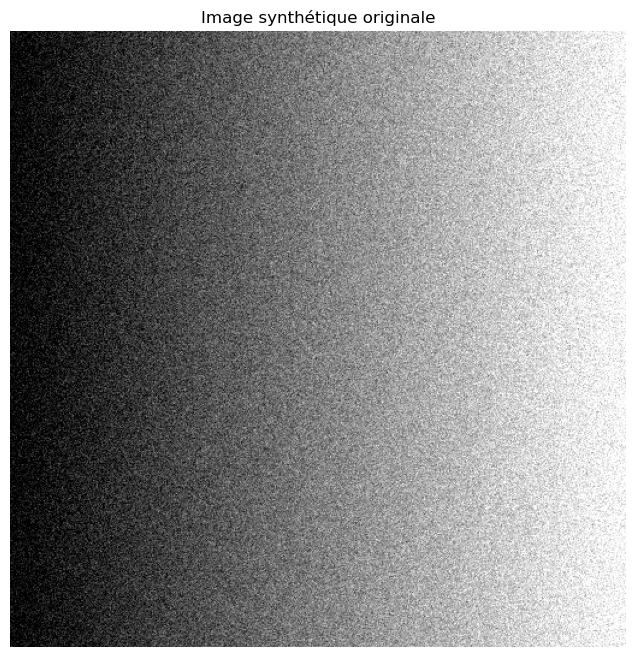

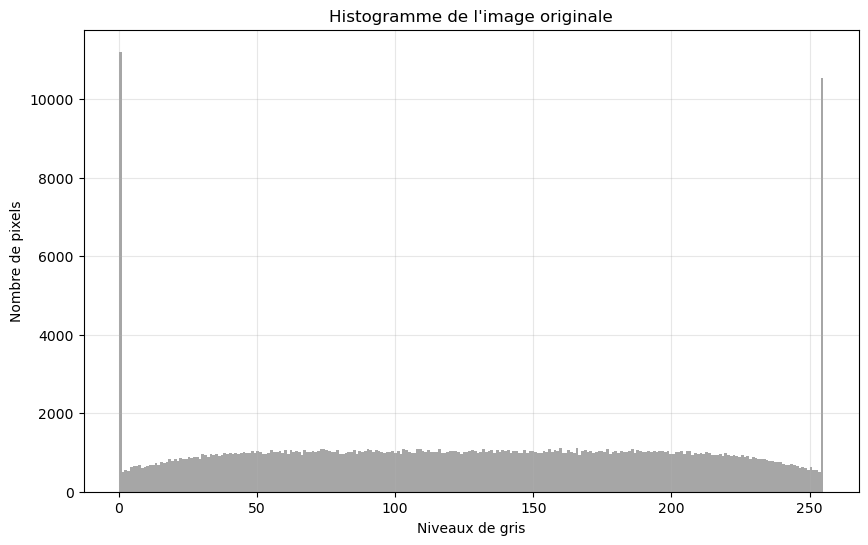

In [5]:
# Créer une image synthétique pour le test
def create_synthetic_image(width=512, height=512):
    """Crée une image synthétique avec un gradient et du bruit"""
    # Créer un gradient de gauche à droite
    x = np.linspace(0, 1, width)
    gradient = np.tile(x, (height, 1))
    
    # Ajouter du bruit gaussien
    noise = np.random.normal(0, 0.1, (height, width))
    
    # Combiner gradient et bruit
    image = gradient + noise
    
    # Normaliser entre 0 et 255
    image = np.clip(image, 0, 1)
    image = (image * 255).astype(np.uint8)
    
    return image

# Créer une image synthétique
synthetic_image = create_synthetic_image()

# Afficher l'image originale et son histogramme
display_image(synthetic_image, "Image synthétique originale")
display_histogram(synthetic_image, "Histogramme de l'image originale")

## 6. Application de l'égalisation d'histogramme et mesure des performances

Temps d'exécution (version avec boucles): 0.5530 secondes


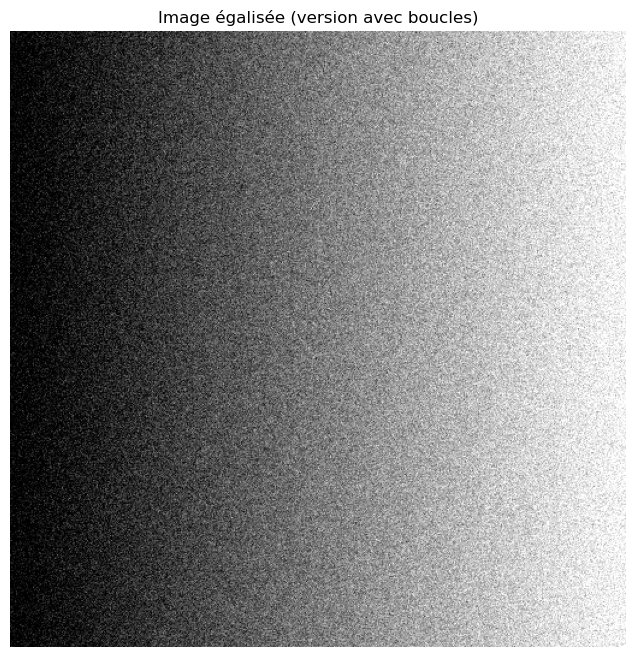

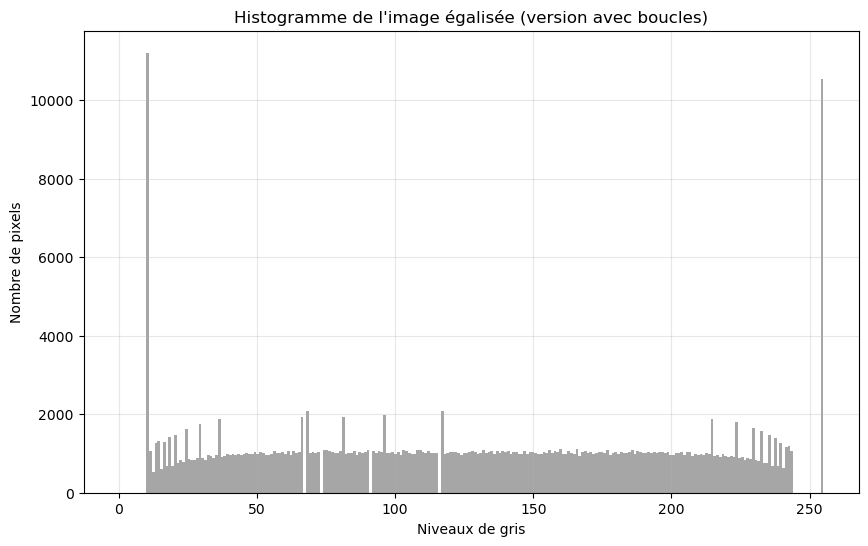

Temps d'exécution (version vectorisée): 0.0057 secondes


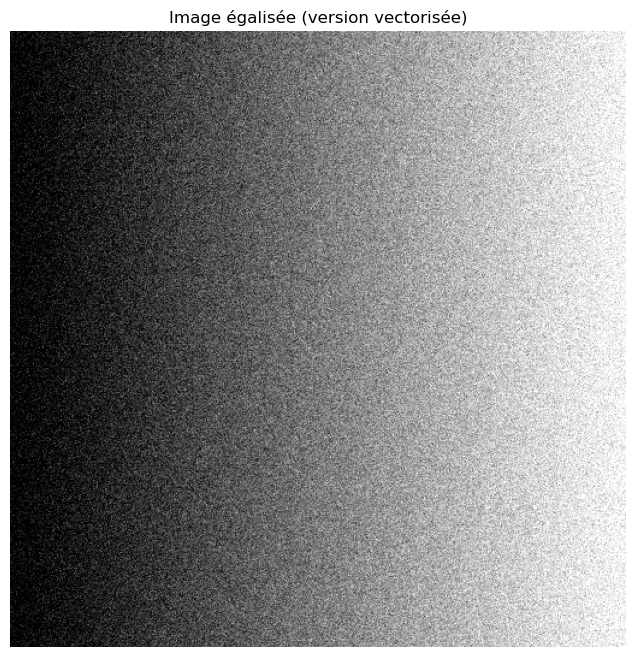

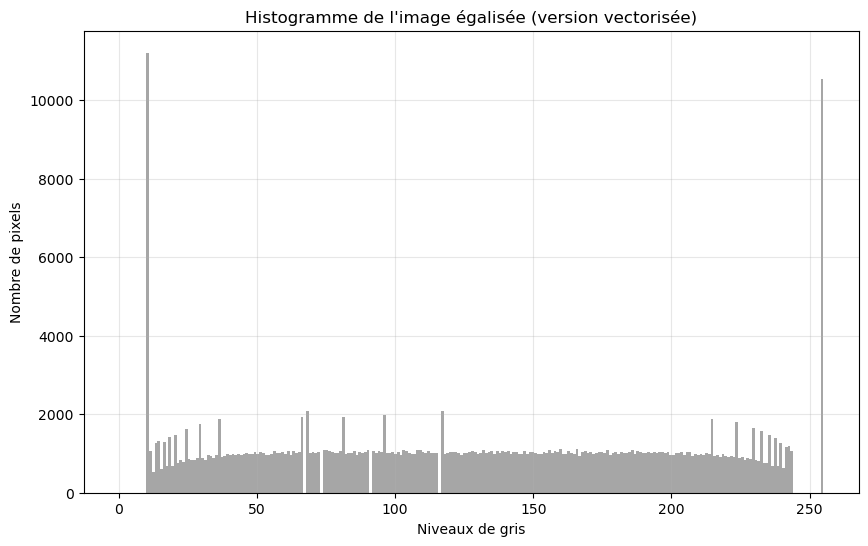

Accélération: 97.30x


In [6]:
# Test de la version avec boucles
start_time = time.time()
equalized_image = equalize_histogram(synthetic_image)
loop_time = time.time() - start_time
print(f"Temps d'exécution (version avec boucles): {loop_time:.4f} secondes")

# Afficher l'image égalisée et son histogramme
display_image(equalized_image, "Image égalisée (version avec boucles)")
display_histogram(equalized_image, "Histogramme de l'image égalisée (version avec boucles)")

# Test de la version vectorisée
start_time = time.time()
equalized_image_vectorized = equalize_histogram_vectorized(synthetic_image)
vectorized_time = time.time() - start_time
print(f"Temps d'exécution (version vectorisée): {vectorized_time:.4f} secondes")

# Afficher l'image égalisée et son histogramme
display_image(equalized_image_vectorized, "Image égalisée (version vectorisée)")
display_histogram(equalized_image_vectorized, "Histogramme de l'image égalisée (version vectorisée)")

# Calcul de l'accélération
speedup = loop_time / vectorized_time
print(f"Accélération: {speedup:.2f}x")

## 7. Test avec une image réelle 

Si vous avez une image réelle, vous pouvez la tester ici.

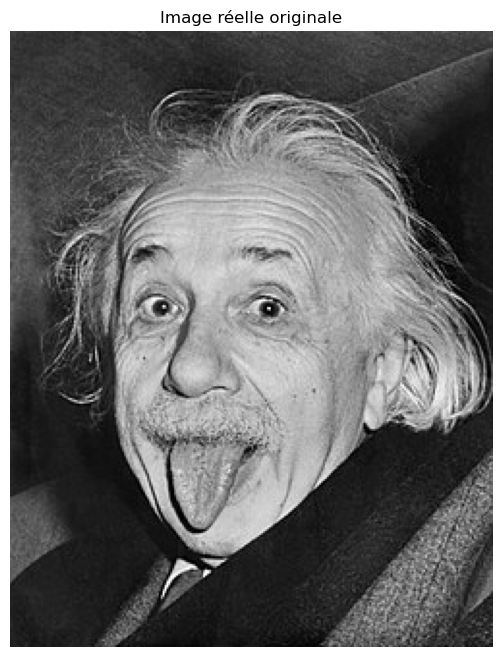

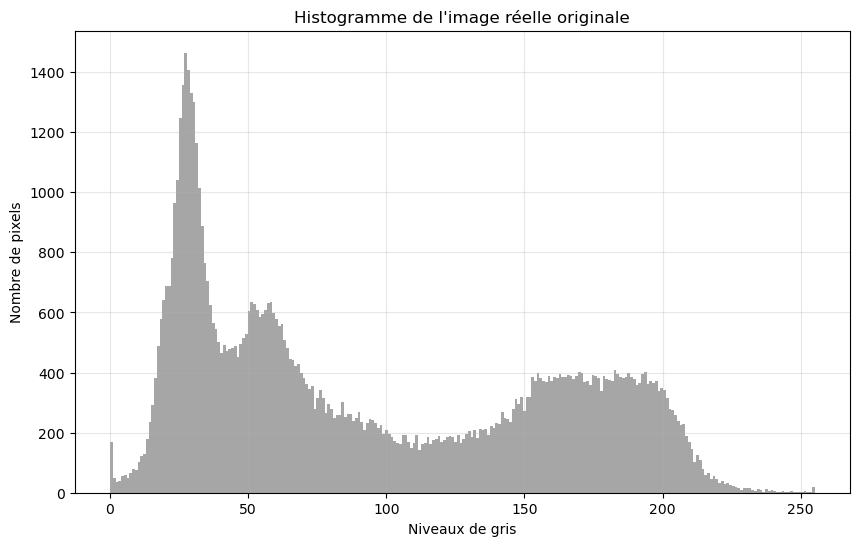

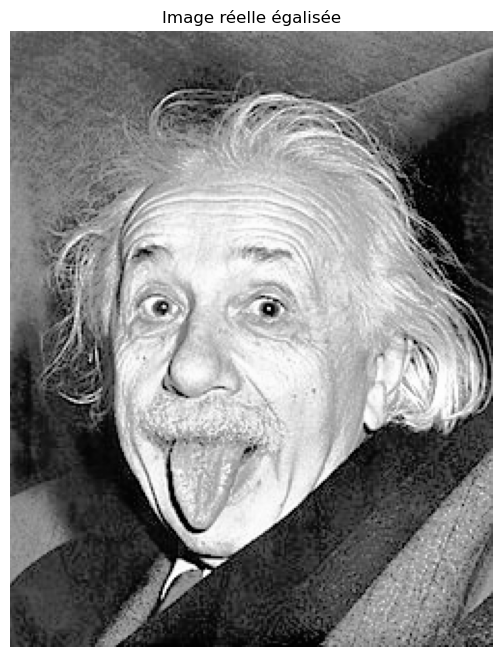

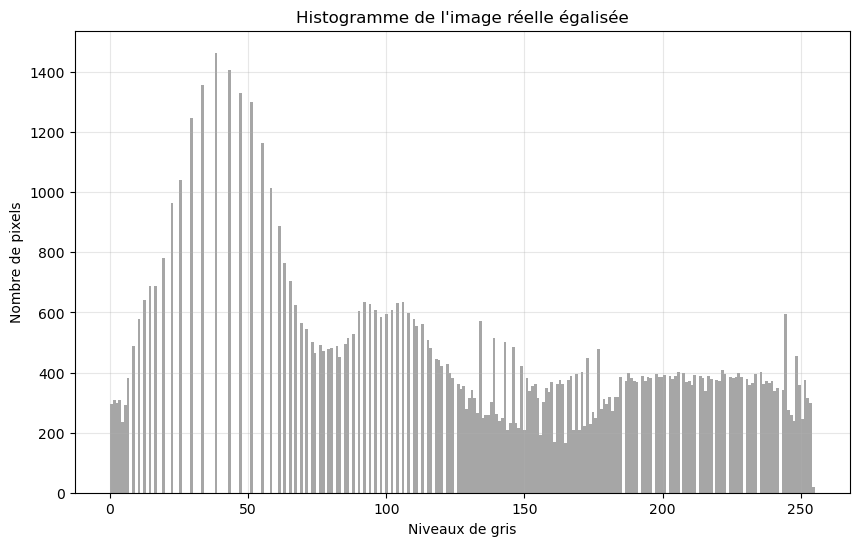

In [7]:
# Décommentez et adaptez ce code si vous avez une image réelle

# Chemin vers votre image
image_path = "einstein.jpg"

# Charger l'image
real_image = load_image(image_path)

# Afficher l'image originale et son histogramme
display_image(real_image, "Image réelle originale")
display_histogram(real_image, "Histogramme de l'image réelle originale")

# Appliquer l'égalisation d'histogramme (version vectorisée)
equalized_real_image = equalize_histogram_vectorized(real_image)

# Afficher l'image égalisée et son histogramme
display_image(equalized_real_image, "Image réelle égalisée")
display_histogram(equalized_real_image, "Histogramme de l'image réelle égalisée")


## 8. Bonus : Fonction de transfert et visualisation

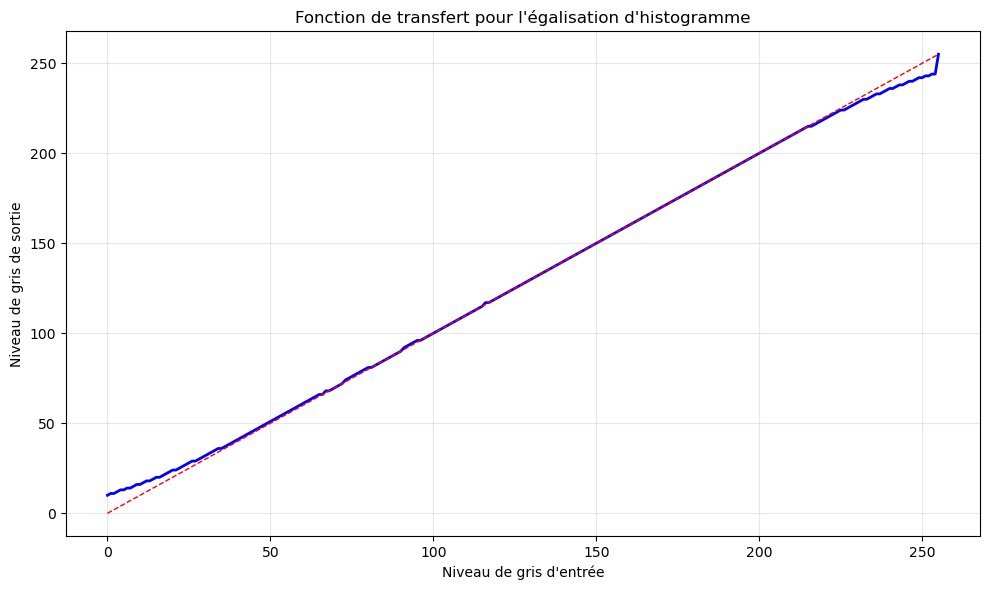

In [8]:
def visualize_transfer_function(image):
    """Visualise la fonction de transfert pour l'égalisation d'histogramme"""
    # Calcul de l'histogramme
    histogram = compute_histogram_vectorized(image)
    
    # Calcul de l'histogramme cumulatif
    cumulative_histogram = np.cumsum(histogram)
    
    # Normalisation de l'histogramme cumulatif
    total_pixels = image.size
    normalized_cumulative_histogram = (cumulative_histogram * 255 / total_pixels).astype(np.uint8)
    
    # Affichage de la fonction de transfert
    plt.figure(figsize=(10, 6))
    plt.plot(range(256), normalized_cumulative_histogram, 'b-', linewidth=2)
    plt.plot([0, 255], [0, 255], 'r--', linewidth=1)  # Ligne de référence (identité)
    plt.title('Fonction de transfert pour l\'égalisation d\'histogramme')
    plt.xlabel('Niveau de gris d\'entrée')
    plt.ylabel('Niveau de gris de sortie')
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

# Visualiser la fonction de transfert pour l'image synthétique
visualize_transfer_function(synthetic_image)